In [17]:
#load data 

import pandas as pd
import pickle
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

X_total = pickle.load(open('X', 'rb'))
Y_fare_total = pickle.load(open('Y_fare', 'rb'))
Y_tip_total = pickle.load(open('Y_tip', 'rb'))
Y_triptime = pickle.load(open('Y_triptime', 'rb'))

In [23]:
traingRecordNumber = 50000
X = X_total.as_matrix()[0:traingRecordNumber,:]
print str(len(X))


y = np.log(Y_fare_total.tolist()[0:traingRecordNumber])
print str(len(y))

50000
50000


# Training

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scores3 = cross_val_score(model, X2, y, cv=4,scoring='neg_mean_squared_error',n_jobs=-1)

In [ ]:
scores3

In [24]:
model = MLPRegressor(early_stopping=True,alpha=0.1)
#scores4 = cross_val_score(model, X2, y, cv=4,scoring='neg_mean_squared_error',n_jobs=-1)

param_grid = [
 {'hidden_layer_sizes': [(30,20),(10,10,10),(100,30),(100,100),(10,10,100)]},
 ]

clf2 = GridSearchCV(model, param_grid, cv=2,scoring='neg_mean_squared_error',
                       n_jobs=-1)

clf2.fit(X,y)

clf2.cv_results_

{'mean_fit_time': array([ 7.0660001 , 12.62600005, 16.28549993, 15.18699992, 11.70749998]),
 'mean_score_time': array([0.04649997, 0.0309999 , 0.11150014, 0.12600005, 0.05500007]),
 'mean_test_score': array([-0.06406653, -0.06915287, -0.06461499, -0.06424179, -0.06809226]),
 'mean_train_score': array([-0.05464449, -0.05928849, -0.05278705, -0.05198372, -0.05775374]),
 'param_hidden_layer_sizes': masked_array(data=[(30, 20), (10, 10, 10), (100, 30), (100, 100),
                    (10, 10, 100)],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (30, 20)},
  {'hidden_layer_sizes': (10, 10, 10)},
  {'hidden_layer_sizes': (100, 30)},
  {'hidden_layer_sizes': (100, 100)},
  {'hidden_layer_sizes': (10, 10, 100)}],
 'rank_test_score': array([1, 5, 3, 2, 4]),
 'split0_test_score': array([-0.06214621, -0.06883679, -0.06324322, -0.06359008, -0.06404691]),
 'split0_train_score': array([-0.05266885, -0.06

In [10]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.000060,0.000020,0.001200,0.001300,0.516560,0.48038,0.000480,0.18988,0.105040,0.079800,...,0.022960,0.038580,0.011980,0.012760,0.02084,0.012900,0.024080,0.016220,0.017860,0.001820
std,0.007746,0.004472,0.034621,0.036032,0.499731,0.49962,0.021904,0.39221,0.306608,0.270986,...,0.149777,0.192594,0.108797,0.112238,0.14285,0.112844,0.153299,0.126322,0.132444,0.042623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
pd.DataFrame(y).describe()

,0
count,50000.00000
mean,654.64968
std,378.63303
min,100.00000
25%,360.00000
50%,600.00000
75%,840.00000
max,2760.00000


In [ ]:
clf2.best_params_

In [ ]:
clf2.best_score_

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

model = DecisionTreeRegressor()

scores5 = cross_val_score(model, X, y, cv=2,n_jobs=-1)

In [ ]:
scores5

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#scores4 = cross_val_score(model, X2, y, cv=4,scoring='neg_mean_squared_error',n_jobs=-1)

param_grid = [
 {'n_estimators': [40,50,70,90,100]},
 ]

clf3 = GridSearchCV(model, param_grid, cv=2,scoring='neg_mean_squared_log_error',
                       n_jobs=-1)

clf3.fit(X,y)

clf3.grid_scores_

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.19956, std: 0.02552, params: {'n_estimators': 40},
 mean: -0.20053, std: 0.02170, params: {'n_estimators': 50},
 mean: -0.19920, std: 0.02161, params: {'n_estimators': 70},
 mean: -0.19799, std: 0.02300, params: {'n_estimators': 90},
 mean: -0.19872, std: 0.02225, params: {'n_estimators': 100}]

In [ ]:
clf3.best_score_

In [ ]:
clf3.grid_scores_

In [ ]:
#5,000 training record
clf3.grid_scores_

In [ ]:
#10,000 training records 
clf3.grid_scores_

In [ ]:
#20,000 
clf3.cv_results_

In [ ]:
#40,000 
clf3.cv_results_

# Trained with XGB

In [33]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(X_total, np.log(Y_fare_total), test_size=0.2, random_state=0)
Xcv,Xv,Zcv,Zv = train_test_split(Xval, Zval, test_size=0.5, random_state=1)
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xcv   , label=Zcv)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

In [34]:
parms = {'max_depth':8, #maximum depth of a tree
         'objective':'reg:linear',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'min_child_weight': 10,
         'nthread'  :3}  #number of cpu core to use

model = xgb.train(parms, data_tr, num_boost_round=1000, evals = evallist,
                  early_stopping_rounds=30, maximize=False, 
                  verbose_eval=100)

print('score = %1.5f, n_boost_round =%d.'%(model.best_score,model.best_iteration))

[0]	train-rmse:1.3125	valid-rmse:1.30508
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 30 rounds.
[100]	train-rmse:0.265514	valid-rmse:0.273577
[200]	train-rmse:0.240893	valid-rmse:0.252235
[300]	train-rmse:0.232123	valid-rmse:0.245444
[400]	train-rmse:0.227685	valid-rmse:0.242847
[500]	train-rmse:0.225254	valid-rmse:0.241905
[600]	train-rmse:0.223585	valid-rmse:0.241148
Stopping. Best iteration:
[598]	train-rmse:0.223618	valid-rmse:0.241115

score = 0.24111, n_boost_round =598.


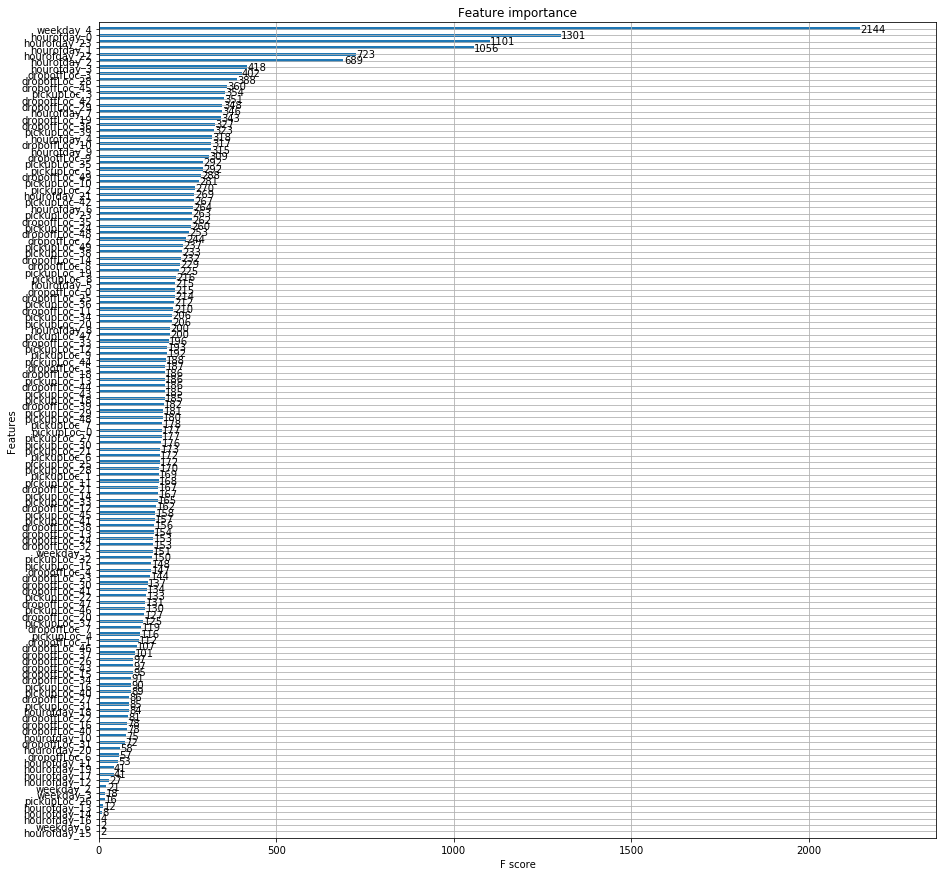

In [32]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(model,ax = axes,height =0.5)
plt.show();plt.close()